## Import Libraries

In [9]:
# standard libraries
import pandas as pd
pd.set_option('display.max_columns', None) 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [10]:
# helper libraries
import os
from zipfile import ZipFile
import json
import random

## Read data & Preprocessing

In [11]:
# open .zip in memory
with ZipFile('train.zip') as myzip:
    print(myzip.printdir())
    with myzip.open('train.csv') as myfile:
        train = pd.read_csv(myfile)

File Name                                             Modified             Size
train.csv                                      2018-12-26 19:17:22      6690166
None


In [12]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [13]:
train.describe(include='all')

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
count,14993.000000,13736,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993,14993.000000,14981,14993,14993.000000,14993.000000
unique,NaN,9060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5595,NaN,14032,14993,NaN,NaN
top,NaN,Baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fa90fa5b1ee11c86938398b60abc32cb,NaN,For Adoption,f48b3cebb,NaN,NaN
freq,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,459,NaN,164,1,NaN,NaN
mean,1.457614,NaN,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,NaN,0.056760,NaN,NaN,3.889215,2.516441
std,0.498217,NaN,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,NaN,0.346185,NaN,NaN,3.487810,1.177265
min,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
25%,1.000000,NaN,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,NaN,0.000000,NaN,NaN,2.000000,2.000000
50%,1.000000,NaN,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,NaN,0.000000,NaN,NaN,3.000000,2.000000
75%,2.000000,NaN,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,NaN,0.000000,NaN,NaN,5.000000,4.000000


In [14]:
[file for file in os.listdir() if '.csv' in file]

['breed_labels.csv', 'color_labels.csv', 'state_labels.csv', 'train.csv']

In [15]:
breed_labels = pd.read_csv('breed_labels.csv', dtype=str)
breed_labels.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [16]:
breed_labels.describe()
# BreedID is unique key even when dogs and cats are put together

,BreedID,Type,BreedName
count,307,307,307
unique,307,2,307
top,31,1,Feist
freq,1,241,1


In [17]:
color_labels = pd.read_csv('color_labels.csv', dtype=str)
color_labels.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [18]:
state_labels = pd.read_csv('state_labels.csv', dtype=str)
state_labels.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


The raw train data uses index numbers (1, 2, 3..) to show categorical columns. To better read and interpret, I am going to convert most of them to texts. The following is from the dataset description:
* Type - Type of animal (1 = Dog, 2 = Cat)
* Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* AdoptionSpeed - Categorical speed of adoption. Lower is faster. 

In [19]:
train['Type'] = train['Type'].replace({1:'Dog', 2:'Cat'})
train['Gender'].replace({1:'Male', 2:'Female', 3: 'Mixed'}, inplace=True)
train['MaturitySize'].replace({1 : 'Small', 2 : 'Medium', 3 : 'Large', 4 : 'Extra Large', 0 : 'Not Specified'}, inplace=True)
train['FurLength'].replace({1 : 'Short', 2 : 'Medium', 3 : 'Long', 0 : 'Not Specified'}, inplace=True)
train['Vaccinated'].replace({1 : 'Yes', 2 : 'No', 3 : 'Not Sure'}, inplace=True)
train['Dewormed'].replace({1 : 'Yes', 2 : 'No', 3 : 'Not Sure'}, inplace=True)
train['Sterilized'].replace({1 : 'Yes', 2 : 'No', 3 : 'Not Sure'}, inplace=True)
train['Health'].replace({1 : 'Healthy', 2 : 'Minor Injury', 3 : 'Serious Injury', 0 : 'Not Specified'}, inplace=True)

In [20]:
for col in ['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'State', 'AdoptionSpeed']:
    train[col] = train[col].astype(str)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null object
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null object
Breed2           14993 non-null object
Gender           14993 non-null object
Color1           14993 non-null object
Color2           14993 non-null object
Color3           14993 non-null object
MaturitySize     14993 non-null object
FurLength        14993 non-null object
Vaccinated       14993 non-null object
Dewormed         14993 non-null object
Sterilized       14993 non-null object
Health           14993 non-null object
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null object
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float

In [22]:
mapbreed = breed_labels[['BreedID', 'BreedName']].set_index('BreedID').to_dict()['BreedName']

In [23]:
mapcolor = color_labels[['ColorID', 'ColorName']].set_index('ColorID').to_dict()['ColorName']

In [24]:
mapstate = state_labels[['StateID', 'StateName']].set_index('StateID').to_dict()['StateName']

In [25]:
train['Breed1'] = train['Breed1'].replace(mapbreed)
train['Breed2'] = train['Breed2'].replace(mapbreed)
train['Color1'] = train['Color1'].replace(mapcolor)
train['Color2'] = train['Color2'].replace(mapcolor)
train['Color3'] = train['Color3'].replace(mapcolor)
train['State'] = train['State'].replace(mapstate)

In [26]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,Cat,Nibble,3,Tabby,0,Male,Black,White,0,Small,Short,No,No,No,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,Cat,No Name Yet,1,Domestic Medium Hair,0,Male,Black,Brown,0,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,Dog,Brisco,1,Mixed Breed,0,Male,Brown,White,0,Medium,Medium,Yes,Yes,No,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,Dog,Miko,4,Mixed Breed,0,Female,Black,Brown,0,Medium,Short,Yes,Yes,No,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,Dog,Hunter,1,Mixed Breed,0,Male,Black,0,0,Medium,Short,No,No,No,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [27]:
train.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

The dataset is very clean with only 12 pets not having description. A thousand pets without names are normal as they are waiting for adoption.

In [28]:
train.describe()

,Age,Quantity,Fee,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.576069,21.259988,0.056760,3.889215
std,18.155790,1.472477,78.414548,0.346185,3.487810
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,2.000000
50%,3.000000,1.000000,0.000000,0.000000,3.000000
75%,12.000000,1.000000,0.000000,0.000000,5.000000
max,255.000000,20.000000,3000.000000,8.000000,30.000000


In [29]:
train.describe(include=['O'])

,Type,Name,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,RescuerID,Description,PetID,AdoptionSpeed
count,14993,13736,14993,14993,14993,14993,14993,14993,14993,14993,14993,14993,14993,14993,14993,14993,14981,14993,14993
unique,2,9060,176,135,3,7,7,6,4,3,3,3,3,3,14,5595,14032,14993,5
top,Dog,Baby,Mixed Breed,0,Female,Black,0,0,Medium,Short,No,Yes,No,Healthy,Selangor,fa90fa5b1ee11c86938398b60abc32cb,For Adoption,f48b3cebb,4
freq,8132,66,5927,10762,7277,7427,4471,10604,10305,8808,7227,8397,10077,14478,8714,459,164,1,4197


### NLP on Description

In [28]:
sentiment = train[['PetID', 'Description']].set_index('PetID')
sentiment.head()

,Description
PetID,
86e1089a3,Nibble is a 3+ month old ball of cuteness. He ...
6296e909a,I just found it alone yesterday near my apartm...
3422e4906,Their pregnant mother was dumped by her irresp...
5842f1ff5,"Good guard dog, very alert, active, obedience ..."
850a43f90,This handsome yet cute boy is up for adoption....


In [29]:
sentiment['docsentiment-magnitude'] = None
sentiment['docsentiment-score'] = None
sentiment['top entity'] = None

In [30]:
for file in os.listdir('train_sentiment'):
    petid = file.replace('.json', '')
    api = json.load(open('train_sentiment/{}.json'.format(petid)))
    sentiment.loc[petid, 'docsentiment-magnitude'] = api['documentSentiment']['magnitude']
    sentiment.loc[petid, 'docsentiment-score'] = api['documentSentiment']['score']
    sentiment.loc[petid, 'top entity'] = api['entities'][0]['name'] if len(api['entities'])>0 else None
sentiment.head()

,Description,docsentiment-magnitude,docsentiment-score,top entity
PetID,,,,
86e1089a3,Nibble is a 3+ month old ball of cuteness. He ...,2.4,0.3,Nibble
6296e909a,I just found it alone yesterday near my apartm...,0.7,-0.2,apartment
3422e4906,Their pregnant mother was dumped by her irresp...,3.7,0.2,mother
5842f1ff5,"Good guard dog, very alert, active, obedience ...",0.9,0.9,guard dog
850a43f90,This handsome yet cute boy is up for adoption....,3.7,0.6,boy


In [31]:
#sentiment_d = sentiment.drop('Description', axis=1)
train = train.merge(sentiment.drop('Description', axis=1).reset_index())
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,docsentiment-magnitude,docsentiment-score,top entity
0,Cat,Nibble,3,Tabby,0,Male,Black,White,0,Small,Short,No,No,No,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,2.4,0.3,Nibble
1,Cat,No Name Yet,1,Domestic Medium Hair,0,Male,Black,Brown,0,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.7,-0.2,apartment
2,Dog,Brisco,1,Mixed Breed,0,Male,Brown,White,0,Medium,Medium,Yes,Yes,No,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,3.7,0.2,mother
3,Dog,Miko,4,Mixed Breed,0,Female,Black,Brown,0,Medium,Short,Yes,Yes,No,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.9,0.9,guard dog
4,Dog,Hunter,1,Mixed Breed,0,Male,Black,0,0,Medium,Short,No,No,No,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,3.7,0.6,boy


In [30]:
# word count
train['word_count'] = train['Description'].apply(lambda x: 0 if str(x)=='nan' else len([word for word in x.split()])) 
train['word_count'].describe()

count    14993.000000
mean        62.953645
std         69.298493
min          0.000000
25%         21.000000
50%         44.000000
75%         81.000000
max       1257.000000
Name: word_count, dtype: float64

In [6]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
'WWW 123'.lower().split()

['www', '123']

In [38]:
train['Des_rm_sw'] = train['Description'].apply(lambda x: \
                           ' '.join([word for word in str(x).lower().split() if word not in stopwords.words('english')]))

In [47]:
import re
print(train['Des_rm_sw'][14963])
re.sub(r'[^\d\w]+', ' ', train['Des_rm_sw'][14963])

pls adopt cat, mix maincoone, active...i let go bcause busy lately....cod putrajaya...do call whatapps interested...


'pls adopt cat mix maincoone active i let go bcause busy lately cod putrajaya do call whatapps interested '

In [67]:
documents = [doc for doc in train['Description'] if str(doc) != 'nan']

In [68]:
len(documents)

14981

In [69]:
# NMF, LDA clustering

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]\
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

/Users/wandajuan/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
home looking loving forever sweet rescued needs lovely new need
Topic 1:
adoption fee free available fees rm ready adopter open neutering
Topic 2:
pls commitment compulsory spay adopt rachel lovely interested amy contact
Topic 3:
dog guard dogs house breed stray alert watch birth obedient
Topic 4:
old female male months black white month breed age dewormed
Topic 5:
puppies birth mother gave rescued dogs adopted female stray help
Topic 6:
cat cats stray indoor lover birth house litter lovely manja
Topic 7:
cute adorable little kitty really naughty kind smart adopt super
Topic 8:
trained toilet litter food box potty eat train dry indoor
Topic 9:
dan saya kucing dia yang di untuk ni boleh manja
Topic 10:
puppy lovely adopt adorable rachel looking born animal help lovers
Topic 11:
kittens mother birth gave cats adopted stray pregnant adopt born
Topic 12:
kitten little food mother stray diet rescued milk eat cats
Topic 13:
friendly people super human likes dogs loves abandoned kids

In [72]:
# matrix
nmf.components_.shape

(20, 1000)

In [76]:
# matrix
lda.components_.shape

(20, 1000)

### Photo Processing

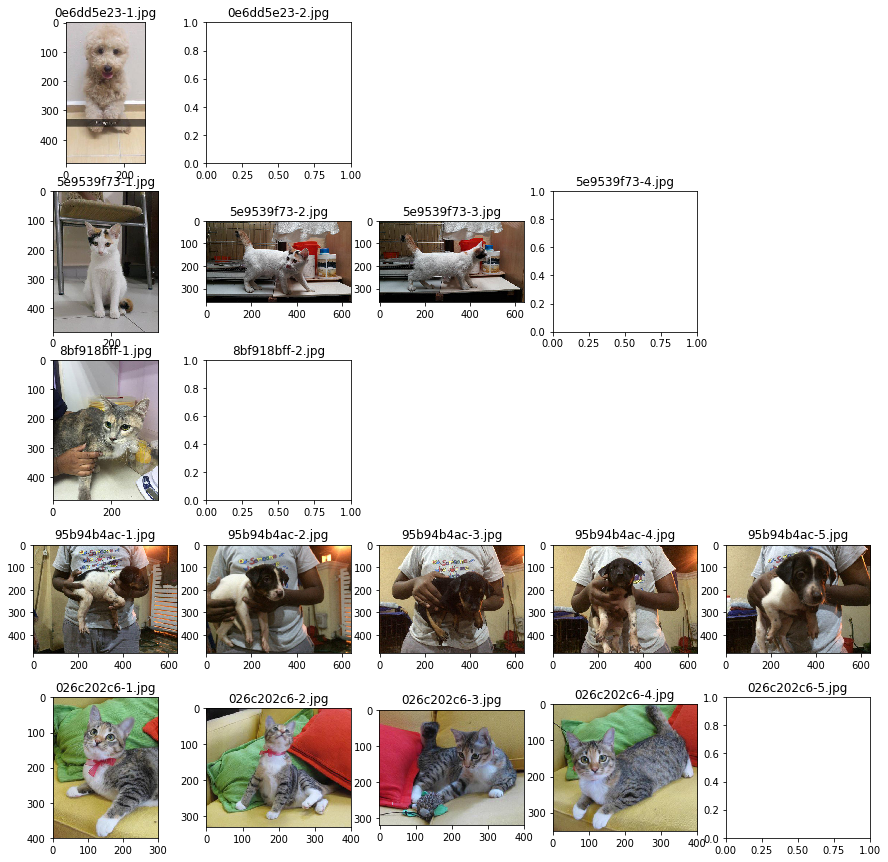

In [223]:
# randomly view 5 pets' first 5 photos
fig = plt.figure(figsize=(15, 15))
cols = 5
rows = 5
with ZipFile('train_images.zip') as my_zip:
    for i in range(5):
        petid = train.loc[train['PhotoAmt']!=0, 'PetID'][random.randint(0, 14652)]
        #print(petid)
        for j in range(5):
            #print('{0}-{1}.jpg'.format(petid, j+1))
            try:
                fig.add_subplot(rows, cols, i*5+j+1)
                plt.title('{0}-{1}.jpg'.format(petid, j+1))
                plt.imshow(mpimg.imread(my_zip.open('{0}-{1}.jpg'.format(petid, j+1))))
            except:
                #print('exception')
                break

## Google Computer Vision API - EntityAnnotation

In [221]:
metadata_list = os.listdir('train_metadata')
metadata_file = metadata_list[random.randint(1, len(metadata_list))]
metadata = json.load(open(os.path.join('train_metadata', metadata_file)))
metadata

{'labelAnnotations': [{'mid': '/m/01yrx',
   'description': 'cat',
   'score': 0.99212366,
   'topicality': 0.99212366},
  {'mid': '/m/03dj64',
   'description': 'black cat',
   'score': 0.9426035,
   'topicality': 0.9426035},
  {'mid': '/m/07k6w8',
   'description': 'small to medium sized cats',
   'score': 0.9190588,
   'topicality': 0.9190588},
  {'mid': '/m/0307l',
   'description': 'cat like mammal',
   'score': 0.9137719,
   'topicality': 0.9137719},
  {'mid': '/m/02zfy2',
   'description': 'bombay',
   'score': 0.9004477,
   'topicality': 0.9004477},
  {'mid': '/m/01rn4d',
   'description': 'korat',
   'score': 0.866598,
   'topicality': 0.866598},
  {'mid': '/m/01mvkt',
   'description': 'burmese',
   'score': 0.801909,
   'topicality': 0.801909},
  {'mid': '/m/012c9l',
   'description': 'domestic short haired cat',
   'score': 0.7101242,
   'topicality': 0.7101242},
  {'mid': '/m/02qlzz',
   'description': 'havana brown',
   'score': 0.62346953,
   'topicality': 0.62346953},
 

I randomly looked at a few pet pictures visually as well as read metadata from Google's API. It looks like the metadata does not provide insightful information, other than this is a dog/cat and maybe a rare breed, which we have already known because of the context. The metadata also provides colors in the picture, but we have pet colors in the primary dataset, which is more precise and specific referring to the pet's color, not the background. So I don't think it is needed to incorporate these metadata to the training dataset. Instead, **PhotoAmt** is a good enough indicator showing how visually the list is showing to the potential adopters. 